# **IBM HR Analytics Employee Attrition Prediction with Decision Tree Classifier**

### **Library Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Dataset description**

- Dataset: **IBM HR Analytics Employee Attrition & Performance**

- Source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

- Description: This dataset contains information related to IBM employee attrition, providing insights into factors influencing employee turnover.

- Content:
    - Employee demographics: Age, gender, marital status, education, job role.
    - Work-related factors: Job satisfaction, performance ratings, work-life balance.
    - Attrition indicators: Attrition status, number of years at the company, distance from home.
    - Compensation details: Salary, monthly income.
    - Employee engagement: Relationship satisfaction, job involvement, training opportunities.

### **Data Imports**

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### **Exploratory Data Analysis**

In [3]:
df.shape

(1470, 35)

In [4]:
#Contexualize individual data rows
display(df.iloc[0])

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [5]:
#Verify data cleanliness
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
#Display basic descriptive statistics for numerical rows
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


A couple of columns that do not provide meaningful information for the purpose of this analysis:
* **EmployeeCount**: All the values are 1.
* **EmployeeNumber**: Sequential count.
* **StandardHours**: All the values are 80.

In [7]:
#Drop the undesirable columns
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_numerical = [e for e in num_col if e not in remove_list]

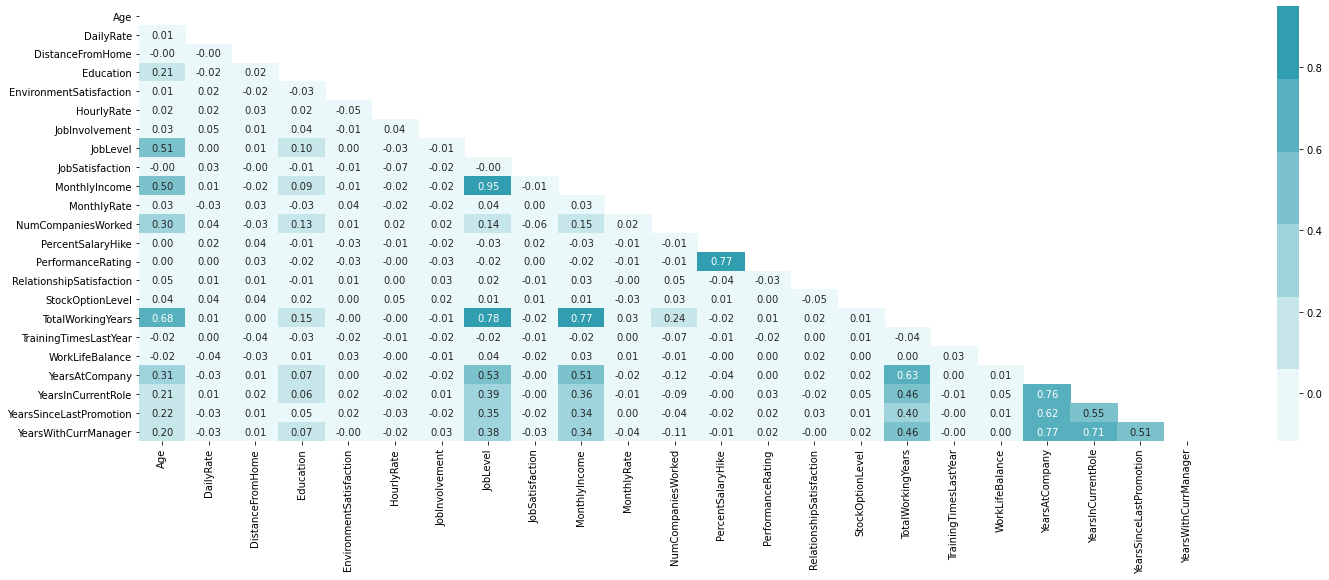

In [8]:
#Plot a heatmap of the correlation matrix
plt.figure(figsize=(24,8))

# Mask the dupicated areas
mask = np.zeros_like(df[col_numerical].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate colormap
cmap = sns.light_palette((210, 90, 60), input="husl")

# Plot the Heatmap
sns.heatmap(df[col_numerical].corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f");

### **Data Preparation**

In [9]:
# Attrition Mapping
attrition_to_num = {'Yes': 0,
                    'No': 1}
df['Attrition_num'] = df['Attrition'].map(attrition_to_num)

In [10]:
# One hot encoding
col_categorical.remove('Attrition')
df_cat = pd.get_dummies(df[col_categorical])
df_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
3,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
4,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1


In [11]:
# Combining numerical and categorical features into the feature matrix X
X = pd.concat([df[col_numerical], df_cat], axis=1)

# Creating the target variable y as 'Attrition_num' for employee attrition prediction
y = df['Attrition_num']

In [12]:
# Verify the necesity of addressing class imbalance the data 
y.value_counts()

1    1233
0     237
Name: Attrition_num, dtype: int64

The class imbalance in the target variable suggests that the dataset is skewed towards the majority class (Employee Attrition). This imbalance can potentially affect the performance of the decision tree classifier, as it may prioritize the majority class and overlook the minority class.

First let us explore the performance of the model without addressing the class imbalance in the dataset, then we use two different methods to tackle class imbalance to see their effectiveness.

### **Model Building and Performance Eval**

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn import preprocessing

In [21]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=35)

In [23]:
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    Helper function for displaying the performance metrics of the model on both
    the training set and the testing set.
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, res_test)))                                             
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res_test))))

In [24]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       984

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[192   0]
 [  0 984]]

ROC AUC: 1.0000

Test Result:

accuracy score: 0.8027

Classification Report: 
               precision    recall  f1-score   support

           0       0.37      0.42      0.40        45
           1       0.89      0.87      0.88       249

    accuracy                           0.80       294
   macro avg       0.63      0.65      0.64       294
weighted avg       0.81      0.80      0.81       294


Confusion Matrix: 
 [[ 19  26]
 [ 32 217]]

ROC AUC: 0.6469



As we can see from the results, even though the model performed perfectly on the training set. The Precision and recall of predicting zeros (Employee Attrition present in this context) is really poor.

***

**Utilizing class weights**

Assigning higher weights to the minority class during model training to make it more influential in the decision-making process.

This adjustment helps the model prioritize correctly predicting instances of the minority class.

***

In [39]:
# Define the class weights
class_weights = {0: 1, 1: 6}  # Increase weight for Class 0

# Create an instance of the DecisionTreeClassifier with class weights
clf2 = DecisionTreeClassifier(random_state=42, class_weight=class_weights)

# Fit the model using the feature matrix X and target variable y
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 6}, random_state=42)

In [40]:
print_score(clf2, X_train, X_test, y_train, y_test, train=True)
print_score(clf2, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       984

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[192   0]
 [  0 984]]

ROC AUC: 1.0000

Test Result:

accuracy score: 0.7687

Classification Report: 
               precision    recall  f1-score   support

           0       0.29      0.36      0.32        45
           1       0.88      0.84      0.86       249

    accuracy                           0.77       294
   macro avg       0.58      0.60      0.59       294
weighted avg       0.79      0.77      0.78       294


Confusion Matrix: 
 [[ 16  29]
 [ 39 210]]

ROC AUC: 0.5995



As the accuracy score, prevision, and recall indicate, this is not a very effective way of addressing class imbalance.

***

**Balancing the dataset**

This involves resampling the data to create a balanced representation of both classes, undersampling will be applied to the training set.

***

In [41]:
from sklearn.utils import resample

# Combine X_train and y_train
df_train = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes in the training set
df_majority = df_train[df_train['Attrition_num'] == 1] 
df_minority = df_train[df_train['Attrition_num'] == 0]

# Undersample the majority class
df_majority_undersampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [43]:
# Combine the undersampled majority class with the minority class
df_train_balanced = pd.concat([df_majority_undersampled, df_minority])

# Separate X_train_balanced and y_train_balanced
X_train_balanced = df_train_balanced.drop('Attrition_num', axis=1)
y_train_balanced = df_train_balanced['Attrition_num']

# Create an instance of the DecisionTreeClassifier
clf3 = DecisionTreeClassifier(random_state=42)

# Fit the model using the balanced dataset
clf3.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [44]:
print_score(clf3, X_train_balanced, X_test, y_train_balanced, y_test, train=True)
print_score(clf3, X_train_balanced, X_test, y_train_balanced, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       192

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384


Confusion Matrix: 
 [[192   0]
 [  0 192]]

ROC AUC: 1.0000

Test Result:

accuracy score: 0.6020

Classification Report: 
               precision    recall  f1-score   support

           0       0.24      0.71      0.35        45
           1       0.92      0.58      0.71       249

    accuracy                           0.60       294
   macro avg       0.58      0.65      0.53       294
weighted avg       0.81      0.60      0.66       294


Confusion Matrix: 
 [[ 32  13]
 [104 145]]

ROC AUC: 0.6467

